我们从人社部网站下载了中国1989年至2016年社会保障金收支及分布情况，现在根据收集到的数据进行 统计分析。
首先读取近30年的社保收入数据：

In [1]:
import xlrd
import pprint
from matplotlib import pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
path = "./datas/人社部/09-01.xls"
data_income = xlrd.open_workbook(path)
table = data_income.sheets()[0]
# table = pd.DataFrame(table)

In [3]:
years = table.col_values(0, start_rowx=11, end_rowx=39)
total = table.col_values(1, start_rowx=11, end_rowx=39)
total = list(map(lambda x:int(x), total))
basic_pension_insurance = table.col_values(2, 11, 39)
# basic_pension_insurance = list(map(lambda x:int(x), basic_pension_insurance))
unemployment_insurance = table.col_values(3, 11, 39)
# unemployment_insurance = list(map(lambda x:int(x), unemployment_insurance))
urban_basic_medical_insurance = table.col_values(4, 11, 39)
# urban_basic_medical_insurance = list(map(lambda x:int(x), urban_basic_medical_insurance))
work_injury_insurance = table.col_values(5, 11, 39)
# work_injury_insurance = list(map(lambda x:int(x), work_injury_insurance))
maternity_insurance = table.col_values(6, 11, 39)
# maternity_insurance = list(map(lambda x:int(x), maternity_insurance))

In [4]:
new = pd.DataFrame([years,total,basic_pension_insurance,unemployment_insurance,
                    urban_basic_medical_insurance,work_injury_insurance,maternity_insurance],
                   index=['years','total','basic_pension_insurance','unemployment_insurance',
                         'urban_basic_medical_insurance','work_injury_insurance','maternity_insurance'])
new= new.T

In [5]:
new.head()


,years,total,basic_pension_insurance,unemployment_insurance,urban_basic_medical_insurance,work_injury_insurance,maternity_insurance
0,1989,153,146.747,6.8,0,0,0
1,1990,186,178.818,7.2,0,0,0
2,1991,225,215.708,9.3,0,0,0
3,1992,377,365.766,11.7,0,0,0
4,1993,526,503.54,17.9,1.4355,2.3923,0.8476


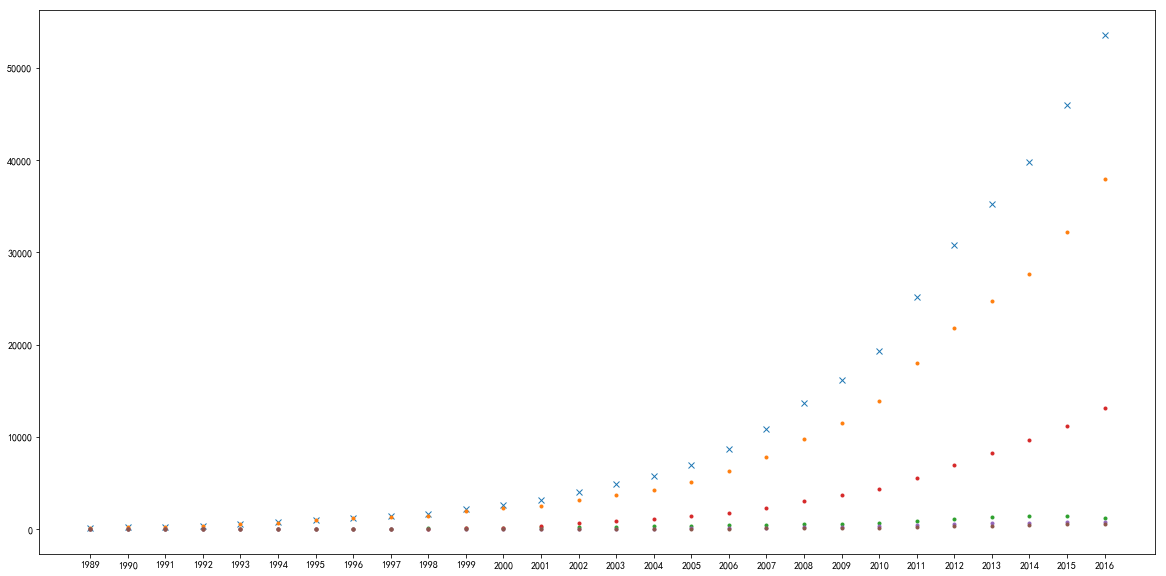

In [18]:
# 绘制点状效果图。此图的绘制不需要堆积，只需要展示在图片上。
plt.figure(figsize=(20,10))
plt.plot(years, total,'x', 
         years, basic_pension_insurance,'.',
         years, unemployment_insurance, '.',
         years, urban_basic_medical_insurance, '.',
         years, work_injury_insurance,'.',
         years, maternity_insurance,'.',)

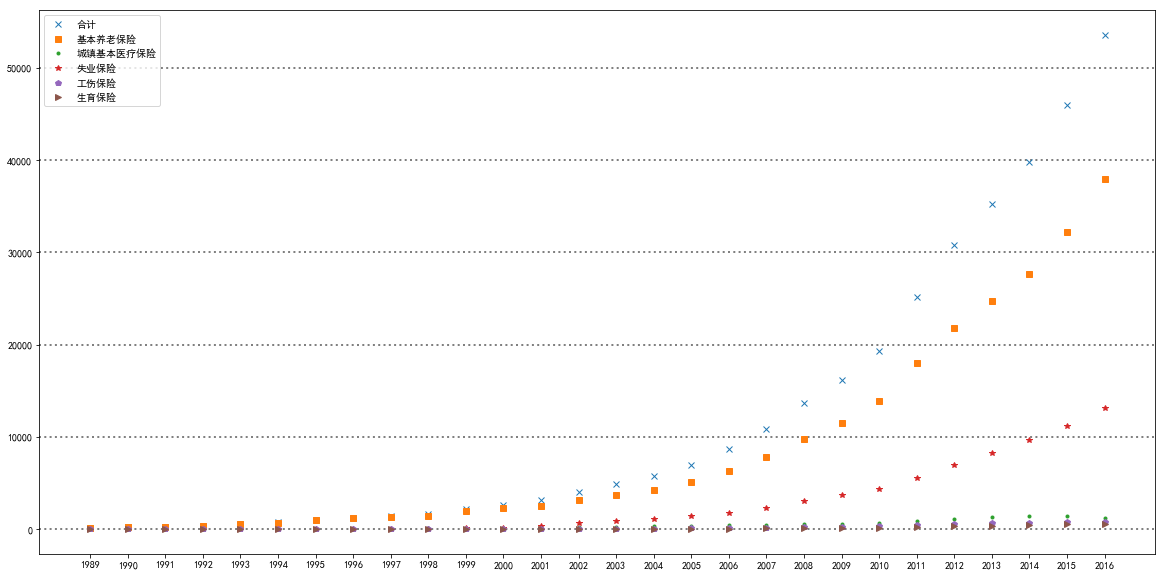

In [44]:
plt.figure(figsize=(20,10))
plt.plot(years, total,'x', label='合计',)
plt.plot(years, basic_pension_insurance,'s', label='基本养老保险',)
plt.plot(years, unemployment_insurance, '.', label='城镇基本医疗保险',)
plt.plot(years, urban_basic_medical_insurance, '*', label='失业保险',)
plt.plot(years, work_injury_insurance,'p', label='工伤保险',)
plt.plot(years, maternity_insurance,'>', label='生育保险',)
# 添加图例
plt.legend(loc='upper left')
# 添加网格线
plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)

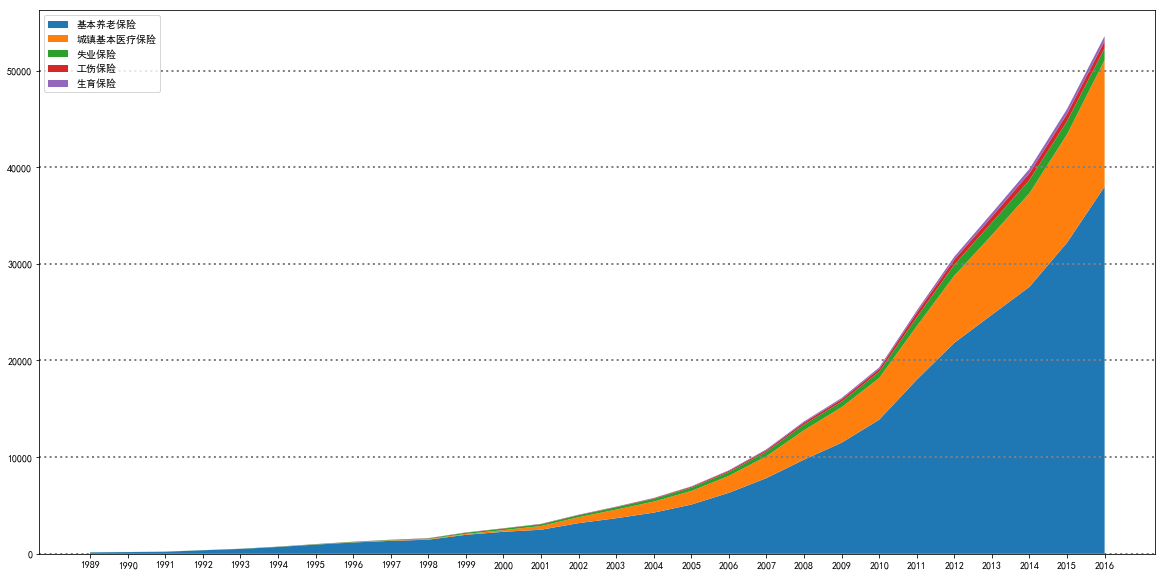

In [43]:
# 堆积柱状图
plt.figure(figsize=(20,10))
plt.stackplot(years, 
              basic_pension_insurance, 
              urban_basic_medical_insurance,
              unemployment_insurance,               
              work_injury_insurance,
              maternity_insurance,
              labels=['基本养老保险', '城镇基本医疗保险', '失业保险','工伤保险', '生育保险'])
# 添加图例
plt.legend(loc='upper left')
# 添加网格线
plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)

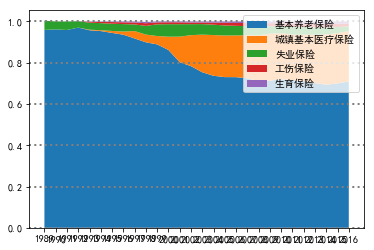

In [162]:
# 计算百分比
basic_pension_insurance_p = [basic_pension_insurance[i]/total[i] for i in range(n)]



urban_basic_medical_insurance_p = [urban_basic_medical_insurance[i]/total[i] for i in range(n)]
unemployment_insurance_p = [unemployment_insurance[i]/total[i] for i in range(n)]
work_injury_insurance_p = [work_injury_insurance[i]/total[i] for i in range(n)]
maternity_insurance_p = [maternity_insurance[i]/total[i] for i in range(n)]
74102.....................................................................................................................................................................................................................................................................................................................................74保险', '失业保险','工伤保险', '生育保险'])

# 添加图例
plt.legend(loc='upper right')
plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)

In [ ]:
# 为了绘制堆叠图，采用讲数据逐一累加的方法，随后一层覆盖一层进行绘制。此处代码仅可使用一次，以避免反复叠加计算。
urban_basic_medical_insurance_t = [basic_pension_insurance[i]+urban_basic_medical_insurance[i] for i in range(n)]
unemployment_insurance_t = [unemployment_insurance[i]+urban_basic_medical_insurance[i] for i in range(n)]
work_injury_insurance_t = [unemployment_insurance[i]+work_injury_insurance[i] for i in range(n)]
maternity_insurance_t = [work_injury_insurance[i]+maternity_insurance[i] for i in range(n)]

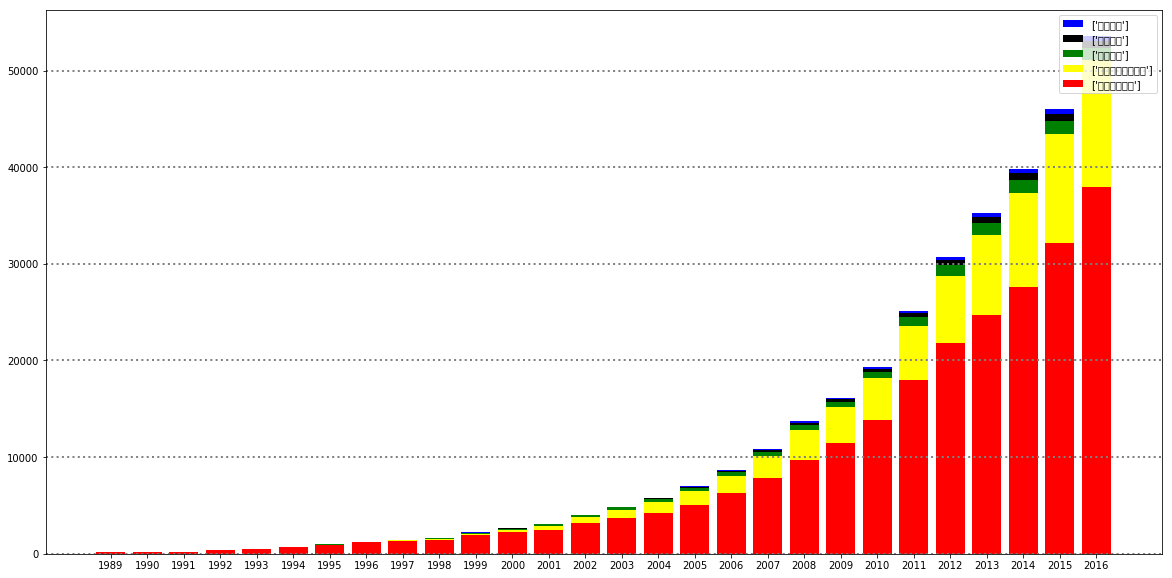

In [144]:
# 堆积柱状图
plt.figure(figsize=(20,10))
n = len(basic_pension_insurance)

plt.bar(years, maternity_insurance_t, color="blue", label=['生育保险'])
plt.bar(years, work_injury_insurance_t, color="black", label=['工伤保险'])
plt.bar(years, unemployment_insurance_t, color="green", label=['失业保险'])
plt.bar(years, urban_basic_medical_insurance_t, color="yellow", label=['城镇基本医疗保险'])
plt.bar(years, basic_pension_insurance_t, color="red", label=['基本养老保险'])

# 添加图例和网格线
plt.legend(loc='upper right')
plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)

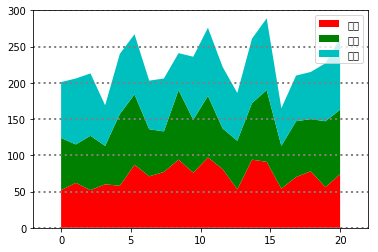

In [148]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
# 假设一个班里有20名学生，x代表他们的编号，y1/y2/y3分别是他们本次月考的成绩。
x = np.linspace(0, 20, 20)
y1 = np.random.randint(50, 100, 20)
y2 = np.random.randint(50, 100, 20)
y3 = np.random.randint(50, 100, 20)

# 堆积柱状图
plt.stackplot(x, y1, y2, y3, baseline='zero', labels=['语文', '数学', '英语'], colors=['r', 'g', 'c'])

# 显示范围
plt.xlim(-2, 22)
plt.ylim(0, 300)

# 添加图例和网格线
plt.legend(loc='upper right')
plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)


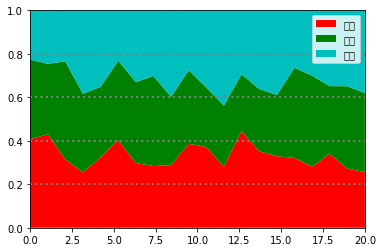

In [149]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
# 假设一个班里有20名学生，x代表他们的编号，y1/y2/y3分别是他们本次月考的成绩。
x = np.linspace(0, 20, 20)
y1 = np.random.randint(50, 100, 20)
y2 = np.random.randint(50, 100, 20)
y3 = np.random.randint(50, 100, 20)

# 计算百分比
y1p = y1 / (y1 + y2 + y3)
y2p = y2 / (y1 + y2 + y3)
y3p = y3 / (y1 + y2 + y3)

# 比例堆积柱状图
plt.stackplot(x, y1p, y2p, y3p, baseline='zero', labels=['语文', '数学', '英语'], colors=['r', 'g', 'c'])

# 显示范围
plt.xlim(0, 20)
plt.ylim(0, 1)

# 添加图例
plt.legend(loc='upper right')
plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)


In [167]:
data = np.array([(1,2,3),
       (4,5,6),
       (7,8,9)])

In [180]:
data

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [171]:
a = data[1:2,:2]

In [175]:
a

array([[4, 5]])

In [177]:
a.shape

(1, 2)

In [173]:
b = data[1,:2]

In [179]:
b

array([4, 5])

In [178]:
b.shape

(2,)

In [181]:
names == "bob"

NameError: name 'names' is not defined